<a href="https://colab.research.google.com/github/Bala534/Regproject/blob/main/Cc_and_Cu(MLR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing the required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from pandas import ExcelWriter
from pandas import ExcelFile

In [3]:
data = pd.read_excel('Cu and Cu Table of Data.xlsx')
data.head()

,S NO,HC (%),NQF (%),C (%),Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,1,0.0,0.00,23.02,2.00,15.00,0.84,2.05
1,2,0.1,0.01,23.02,1.98,15.01,0.85,2.05
2,3,0.2,0.02,23.03,1.96,15.04,0.86,2.06
3,4,0.3,0.03,23.03,1.96,15.09,0.87,2.06
4,5,0.4,0.04,23.04,1.93,15.14,0.88,2.06


In [4]:
data.rename(columns = {'Unnamed: 4':'Ac','Unnamed: 5':'Φ','Unnamed: 6':'Cc','Unnamed: 7':'Cu'}, inplace = True) # Changing the column names

In [5]:
data.head()

,S NO,HC (%),NQF (%),C (%),Ac,Φ,Cc,Cu
0,1,0.0,0.00,23.02,2.00,15.00,0.84,2.05
1,2,0.1,0.01,23.02,1.98,15.01,0.85,2.05
2,3,0.2,0.02,23.03,1.96,15.04,0.86,2.06
3,4,0.3,0.03,23.03,1.96,15.09,0.87,2.06
4,5,0.4,0.04,23.04,1.93,15.14,0.88,2.06


In [6]:
data.shape # no of rows and columns

(121, 8)

In [7]:
data.isna().any()

S NO       False
HC (%)     False
NQF (%)    False
C (%)      False
Ac         False
Φ          False
Cc         False
Cu         False
dtype: bool

In [8]:
data.isna().sum().sum()

0

In [9]:
del data['S NO']

Conduct Pearson’s regression to determine the agreement between all parameters with the outputs (Cu and Cc) and present basic linear fittings. 

In [10]:
x = data['Cc'] # taking the Cc column
y = data['Cu'] # taking the Cu column

In [11]:
from scipy.stats import pearsonr 

In [12]:
r, _  = pearsonr(x,y) # calculating the pearson's correlation coefficient for two variables
r 

0.9657678969639489

In [13]:
np.corrcoef(x, y) # another method for calculating the pearson's correlation coefficient for two variables

array([[1.       , 0.9657679],
       [0.9657679, 1.       ]])

In [14]:
corMat = data.corr()
print(corMat)

           HC (%)   NQF (%)     C (%)        Ac         Φ        Cc        Cu
HC (%)   1.000000  1.000000  0.996439 -0.993883  0.992387  0.994610  0.982764
NQF (%)  1.000000  1.000000  0.996439 -0.993883  0.992387  0.994610  0.982764
C (%)    0.996439  0.996439  1.000000 -0.997008  0.993742  0.984554  0.983685
Ac      -0.993883 -0.993883 -0.997008  1.000000 -0.991463 -0.983404 -0.981070
Φ        0.992387  0.992387  0.993742 -0.991463  1.000000  0.980971  0.972374
Cc       0.994610  0.994610  0.984554 -0.983404  0.980971  1.000000  0.965768
Cu       0.982764  0.982764  0.983685 -0.981070  0.972374  0.965768  1.000000


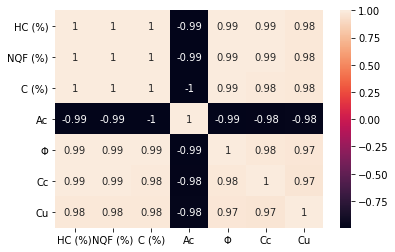

In [15]:
sns.heatmap(corMat, annot=True)
plt.show()

*From the above we can say that there is a positive correlation between Cc and Cu.*

*which clearly says x and y both are strongly correlated with each other.*

Text(0, 0.5, 'Cu')

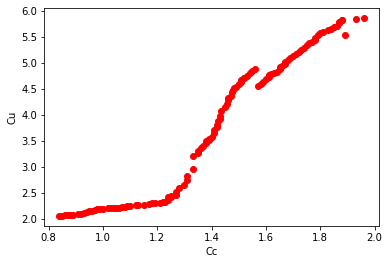

In [16]:
plt.scatter(x,y,color='red')
plt.xlabel('Cc')
plt.ylabel('Cu') 

Text(0, 0.5, 'Cu')

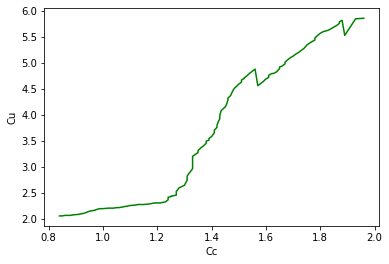

In [17]:
plt.plot(x,y,color='g')
plt.xlabel('Cc')
plt.ylabel('Cu')

Present frequency histograms of the variables.



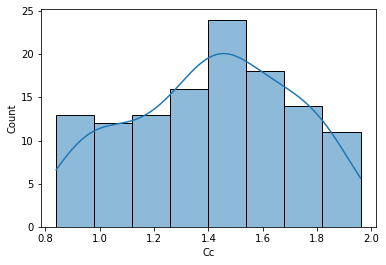

In [18]:
sns.histplot(data=data, x="Cc",kde=True) # histogram for the Cc variable

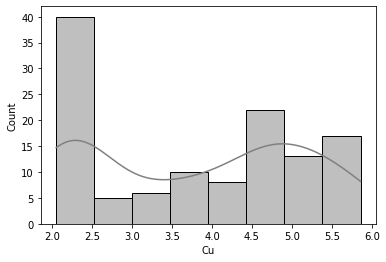

In [19]:
sns.histplot(data=data, x="Cu",color='grey',kde=True) # histogram for the Cu variable

Train, Validate and Test. Present the architecture of the program.

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split  

In [21]:
# taking the independent variables and dependent variables
features = data[['HC (%)','NQF (%)','C (%)','Ac','Φ']].values
labels = data[['Cc','Cu']].values

In [22]:
# Now divide the data into train and test. Here we are keeping 20% as our test set
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.2)

In [23]:
poly_regs= PolynomialFeatures(degree= 2)  
z = poly_regs.fit_transform(x_train)  
model =LinearRegression()  
model.fit(z, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
# Predicting for the test data
m = poly_regs.fit_transform(x_test)

In [25]:
y_pred = model.predict(m)
y_pred

array([[1.3427653 , 3.12395849],
       [1.18632484, 2.38886983],
       [0.92087742, 1.96662228],
       [1.4301465 , 3.86267749],
       [1.6909358 , 5.09565793],
       [1.54564534, 5.04128378],
       [1.90937782, 5.82411036],
       [1.651558  , 4.95545668],
       [1.39539937, 3.48951898],
       [0.87894332, 1.9656581 ],
       [1.01389218, 2.10963516],
       [1.4623484 , 4.2416898 ],
       [1.26863107, 2.55385169],
       [0.97228564, 2.23092761],
       [1.49835894, 4.57075495],
       [1.87397773, 5.74887073],
       [1.58273106, 4.62907541],
       [1.41939226, 3.74069027],
       [0.99133131, 2.21797103],
       [1.74803653, 5.3538705 ],
       [1.20349138, 2.45809584],
       [0.9036353 , 2.12909063],
       [0.84821765, 2.020103  ],
       [0.90909495, 2.06064012],
       [0.99997696, 2.189825  ]])

In [26]:
# performing the cross validation using KFold
from sklearn.model_selection import cross_validate,KFold,cross_val_score 

In [27]:
cross_val_score(LinearRegression(),features,labels).mean()

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

-43.21816662688811

Conduct performance evaluation in comparison between measured and predicted values using MLR, R^2, RMSE, MAE, MSE, and any other evaluation parameter.

In [28]:
mean_absolute_error(y_test,y_pred) # calculating the mean absolute error for actual and predicted values

0.040485160186424035

In [29]:
mean_squared_error(y_test,y_pred) # calculating the mean squared error for actual and predicted values

0.005106815200759843

In [30]:
r2_score(y_test,y_pred) # calculating the r2 error for actual and predicted values

0.996734682278998

In [31]:
from math import sqrt
rmse = sqrt(r2_score(y_test,y_pred)) # calculating the root mean squared error for actual and predicted values
rmse

0.9983660061715833

Present the parametric study graph.

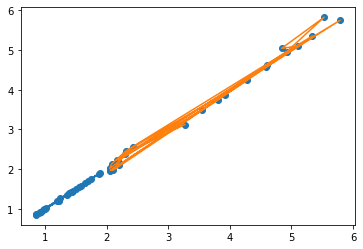

In [32]:
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_pred)

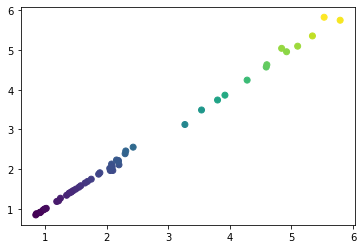

In [33]:
plt.scatter(y_test, y_pred, c=y_pred, cmap='viridis');

Conduct sensitivity analysis to determine the influence of each parameter on the predicted parameters.

In [34]:
from sklearn.datasets import make_regression
from xgboost import XGBRegressor

M, n = make_regression(n_samples=500, n_features=5, n_informative=2, noise=0.3)
M = pd.DataFrame(M, columns=['HC (%)','NQF (%)','C (%)','Ac','Φ'])

model = XGBRegressor()
model.fit(M, n)

[12:56:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

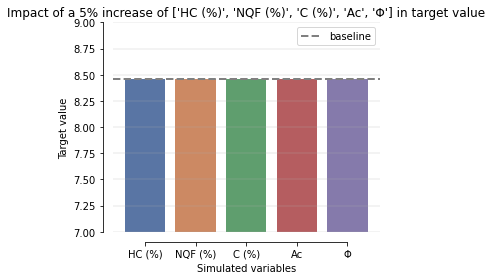

In [35]:
class Simulate:
    def __init__(self, obs, var):
        self.obs = obs
        self.var = var

    def simulate_increase(self, model, percentage):
        baseline = model.predict(self.obs)
        plus = {}
        for ivar in self.var:
            M_plus = self.obs.copy()
            M_plus[ivar] = M_plus[ivar] + M_plus[ivar] * (percentage / 100)
            plus[ivar] = model.predict(M_plus)
        b = pd.DataFrame(
            plus, index=['simulated'
                         ]).T.reset_index().rename(columns={'index': 'test'})
        b['baseline'] = baseline[0]
        return b

    @staticmethod
    def plot_simulation(d, **kwargs):
        fig, ax = plt.subplots()
        sns.barplot(x='test', y='simulated', data=d, palette='deep', ax=ax)
        ax.axhline(d['baseline'].values[0], color='grey', linestyle='--', linewidth=2)
        ax.plot([0, 0], [-100, -100], color='grey', linestyle='--', linewidth=2, label='baseline')

        maxi = int(d['simulated'].max() + d['simulated'].max() * 0.1)
        mini = int(d['simulated'].min() - d['simulated'].min() * 0.1)
        ax.set_ylim([mini, maxi])

        ax.set_xlabel('Simulated variables')
        ax.set_ylabel('Target value')
        ax.set_title(kwargs.get('title'))
        ax.legend()

        ax.grid(axis='y', linewidth=.3)
        sns.despine(offset=10, trim=True)
        plt.tight_layout()
        plt.show()


VAR_OPTIMIZE = ['HC (%)','NQF (%)','C (%)','Ac','Φ']
PERC = 5
ROW = M.iloc[[29]]

S = Simulate(obs=ROW, var=VAR_OPTIMIZE)
d = S.simulate_increase(model=model, percentage=PERC)
S.plot_simulation(d, title=f'Impact of a {PERC}% increase of {VAR_OPTIMIZE} in target value')

In [36]:
x = data['Cc'].tail(25)
y = np.array([1.29149419, 1.01566394, 1.32896709, 1.1578421 , 1.41585831,
       1.41241184, 0.91023   , 1.49030602, 1.63368735, 1.45592231,
       1.85366474, 1.59783352, 1.22373724, 1.00195243, 1.522767  ,
       1.20215062, 1.53980988, 1.46482312, 1.09592096, 1.26164665,
       1.60396471, 1.8370517 , 1.75772945, 1.23066601, 1.28703643])

Text(0, 0.5, 'Predicted Cc')

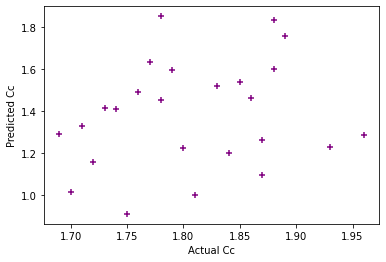

In [37]:
plt.scatter(x,y,color='purple',marker='+')
plt.xlabel('Actual Cc')
plt.ylabel('Predicted Cc')

In [38]:
m = data['Cu'].tail(25)
n = np.array([2.87200115, 2.12266753, 3.03603543, 2.31834166, 3.73382332,
       3.70669032, 2.06630356, 4.50295584, 4.91967054, 4.16134095,
       5.67752919, 4.81234664, 2.38633798, 2.17784937, 4.7878039 ,
       2.46864777, 4.97188209, 4.24681168, 2.23501875, 2.44083269,
       4.84888229, 5.59037939, 5.38117732, 2.46902546, 2.80009303])

Text(0, 0.5, 'Predicted Cu')

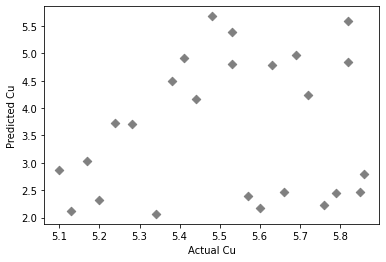

In [39]:
plt.scatter(m,n,color='grey',marker='D')
plt.xlabel('Actual Cu')
plt.ylabel('Predicted Cu')

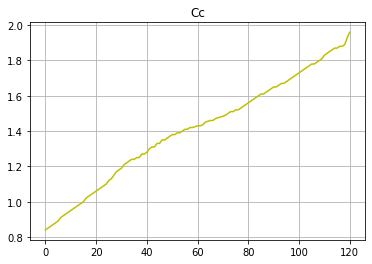

In [40]:
z = data['Cc']
plt.plot(z,color='y')
plt.title('Cc')
plt.grid()

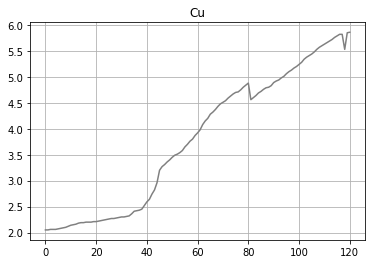

In [41]:
p = data['Cu']
plt.plot(p,color='grey')
plt.title('Cu')
plt.grid()

In [42]:
features = data[['HC (%)','NQF (%)','C (%)','Ac','Φ']].values
labels = data[['Cc']].values

In [43]:
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.2)

In [44]:
poly_regs= PolynomialFeatures(degree= 1)  
z = poly_regs.fit_transform(x_train)  
model =LinearRegression()  
model.fit(z, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
m1 = poly_regs.fit_transform(x_test)

In [46]:
y_pred1 = model.predict(m1)
y_pred1

array([[1.59431115],
       [1.35908216],
       [0.96855212],
       [1.00191433],
       [1.18439864],
       [1.45153828],
       [1.51863454],
       [1.57914131],
       [1.36783511],
       [1.44411269],
       [1.65271504],
       [1.58672623],
       [0.90674342],
       [1.03411945],
       [1.43520041],
       [1.69217244],
       [1.70766096],
       [1.72548552],
       [1.8168347 ],
       [1.32466164],
       [1.10333925],
       [1.4147817 ],
       [1.79784211],
       [1.07506658],
       [1.47896514]])

In [47]:
mean_absolute_error(y_test,y_pred1)

0.014638512361047984

In [48]:
mean_squared_error(y_test,y_pred1)

0.00027900489858054907

In [49]:
from math import sqrt
rmse1 = sqrt(mean_squared_error(y_test,y_pred1)) # calculating the root mean squared error for actual and predicted values
rmse1

0.0167034397230196

In [50]:
r2_score(y_test,y_pred1)

0.9960908003072865

In [51]:
x11 = np.array(['MAE','MSE','RMSE','R2_error'])
y11 = np.array([0.0160,0.0003,0.0197,0.9954])

Text(0, 0.5, 'value')

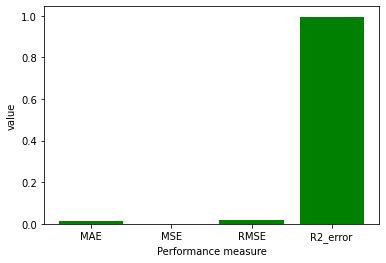

In [52]:
plt.bar(x11,y11,color='g')
plt.xlabel('Performance measure')
plt.ylabel('value')

In [53]:
features1 = data[['HC (%)','NQF (%)','C (%)','Ac','Φ']].values
labels1 = data[['Cu']].values

In [54]:
x_train,x_test,y_train,y_test = train_test_split(features1,labels1,test_size=0.2)

In [55]:
poly_regs= PolynomialFeatures(degree= 1)  
z = poly_regs.fit_transform(x_train)  
model =LinearRegression()  
model.fit(z, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
m2 = poly_regs.fit_transform(x_test)

In [57]:
y_pred2 = model.predict(m2)
y_pred2

array([[2.14162472],
       [4.83760146],
       [5.02635324],
       [1.85856221],
       [3.80919374],
       [2.37367535],
       [5.75790656],
       [4.5544738 ],
       [2.78850321],
       [2.00100507],
       [3.54179675],
       [1.90276288],
       [4.55025831],
       [5.62036702],
       [4.93197735],
       [1.91112556],
       [1.96222215],
       [2.13671001],
       [4.11192568],
       [4.1561687 ],
       [5.48817194],
       [5.99384628],
       [5.53485685],
       [2.32943233],
       [2.24094628]])

In [58]:
mean_absolute_error(y_test,y_pred2)

0.14575776804399065

In [59]:
mean_squared_error(y_test,y_pred2)

0.02994191259579853

In [60]:
from math import sqrt
rmse2 = sqrt(mean_squared_error(y_test,y_pred2)) # calculating the root mean squared error for actual and predicted values
rmse2

0.1730373156165991

In [61]:
r2_score(y_test,y_pred2)

0.9855253348104935

In [62]:
x12 = np.array(['MAE','MSE','RMSE','R2_error'])
y12 = np.array([0.1966,0.0586,0.2421,0.9579])

Text(0, 0.5, 'value')

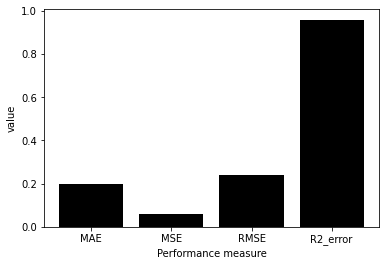

In [63]:
plt.bar(x12,y12,color='black')
plt.xlabel('Performance measure')
plt.ylabel('value')